This notebook investigates correlations between metrics measuring 'partisan bias'.

In [25]:
from typing import List, Dict, Any

import os
import pandas as pd

from rdametrics import states, chambers, ensembles,combos, plot_xy, make_correlation_tables, average_correlation_tables

Load the scores dataframe

In [20]:
scores_path: str = "~/local/beta-ensembles/dataframe/contents/scores_df.parquet"
scores_df = pd.read_parquet(os.path.expanduser(scores_path))
scores_df.head()

,map,estimated_vote_pct,pr_deviation,estimated_seats,fptp_seats,disproportionality,efficiency_gap_wasted_votes,efficiency_gap_statewide,efficiency_gap,seats_bias,...,proportional_coalitions,minority,county_splitting,district_splitting,counties_split,county_splits,splitting,state,chamber,ensemble
0,2500,0.4837,0.0762,11.8678,11,0.0598,0.1075,0.0744,0.0435,0.0299,...,13,68,1.5858,1.5834,35,64,2,FL,congress,A0
1,5000,0.4837,0.0827,11.6842,11,0.0664,0.0973,0.0744,0.0500,0.0415,...,13,75,1.6487,1.6488,38,71,0,FL,congress,A0
2,7500,0.4837,0.0646,12.1917,12,0.0482,0.0673,0.0387,0.0319,0.0232,...,13,70,1.6020,1.6233,39,70,0,FL,congress,A0
3,10000,0.4837,0.0647,12.1873,12,0.0484,0.0745,0.0387,0.0320,0.0271,...,13,71,1.6085,1.5958,33,67,0,FL,congress,A0
4,12500,0.4837,0.0408,12.8575,13,0.0245,0.0399,0.0030,0.0081,0.0042,...,13,74,1.5676,1.5361,34,60,8,FL,congress,A0


Convert the `disproprtionality` column

In [21]:
df = pd.DataFrame({
    'state': scores_df['state'],
    'chamber': scores_df['chamber'],
    'ensemble': scores_df['ensemble'],
    'proportionality': scores_df['proportionality'],
    'disproportionality': 1 - abs(scores_df['disproportionality'])
})

I think the low correlation between the `proportionality` rating and raw `dispropotionality` is due to the clipping of the range as part of nornalizing raw scores.

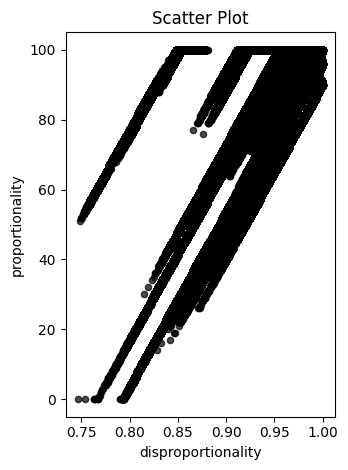

In [22]:
plot_xy(df, "disproportionality", "proportionality")

In [23]:
focus_metrics: List[str] = ["disproportionality", "proportionality"]
D = make_correlation_tables(states, chambers, df, focus_metrics)
D

{('FL',
  'congress'):                     disproportionality  proportionality
 disproportionality            1.000000         0.999293
 proportionality               0.999293         1.000000,
 ('FL',
  'upper'):                     disproportionality  proportionality
 disproportionality             1.00000          0.94403
 proportionality                0.94403          1.00000,
 ('FL',
  'lower'):                     disproportionality  proportionality
 disproportionality            1.000000         0.997143
 proportionality               0.997143         1.000000,
 ('IL',
  'congress'):                     disproportionality  proportionality
 disproportionality            1.000000         0.551777
 proportionality               0.551777         1.000000,
 ('IL',
  'upper'):                     disproportionality  proportionality
 disproportionality            1.000000         0.902882
 proportionality               0.902882         1.000000,
 ('IL',
  'lower'):                    

In [26]:
avg_corr = average_correlation_tables(D, focus_metrics, combos)
avg_corr

,disproportionality,proportionality
disproportionality,1.00,0.94
proportionality,0.94,1.00


So, `proportionality` is almost perfectly correlated with `disproportionality` when the deviation from PR is normalized, but when raw `disproportionality` can be plus or minus and the range is clipped the "correlation" drops.